In [182]:
import sys
from qiskit import*
#from qiskit import Aer
import qiskit.quantum_info as qi
import numpy as np
#from math import pi
#import matplotlib.pyplot as plt
import re

In [183]:
L = 6;

# Circuit for the $L$ qubit Toffoli gate

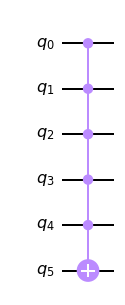

In [184]:
qc = QuantumCircuit(L)
qc.mcx([i for i in range(L-1)],L-1)
qc.draw("mpl")

# Transpiling the $L$ qubit Toffoli gate

In [185]:
trans_qc = transpile(qc, basis_gates = ['u1','rx','cx'], optimization_level = 1)
#trans_qc.draw("mpl")

In [186]:
len(trans_qc)

190

In [187]:
def extract_gate_details(gate_index, gate_instruction_string):
    
    gate_string = str(gate_instruction_string[gate_index])
    gate_as_list = []
    
    # u1 gate.
    if "u1" in gate_string:
        
        match = re.search(r"ParameterExpression\((-?\d+\.\d+)", gate_string)
        if match:
            angle          = float(match.group(1))
            qubit_acted_on = re.search(r", 'q'\), (\d+)", gate_string).group(1)
            
        match = re.search(r"params=\[([\d.]+)\]", gate_string)
        if match:
            angle          = float(match.group(1))
            qubit_acted_on = re.search(r", 'q'\), (\d+)", gate_string).group(1)            
        
        match = re.search(r"params=\[(\d+\.\d+)", gate_string)
        if match:
            angle          = float(match.group(1))
            qubit_acted_on = re.search(r", 'q'\), (\d+)", gate_string).group(1)
            
        gate_as_list.append(["u1",angle,qubit_acted_on])
        
    # u1 gate.
    elif "rx" in gate_string:
        
        match = re.search(r"ParameterExpression\((-?\d+\.\d+)", gate_string)
        if match:
            angle          = float(match.group(1))
            qubit_acted_on = re.search(r", 'q'\), (\d+)", gate_string).group(1)        
        
        match = re.search(r"params=\[([\d.]+)\]", gate_string)
        if match:
            angle          = float(match.group(1))
            qubit_acted_on = re.search(r", 'q'\), (\d+)", gate_string).group(1)
            
        match = re.search(r"params=\[(\d+\.\d+)", gate_string)
        if match:
            angle          = float(match.group(1))
            qubit_acted_on = re.search(r", 'q'\), (\d+)", gate_string).group(1)
            
        gate_as_list.append(["rx",angle,qubit_acted_on])
        
    # controlled gate.    
    elif "cx" in gate_string:
        match = re.search(r"(\d+)(?=\), Qubit\(QuantumRegister)", gate_string)
        if match:
            control_qubit =  int(match.group())
                
        match = re.search(r"(\d+)(?=\)\), clbits=\(\))", gate_string)
        if match:
            target_qubit = int(match.group())

        gate_as_list.append(["cx",control_qubit,target_qubit])
    else:
        print("Kant")
    return gate_as_list

In [188]:
file = open('gates_list_'+str(L)+'.txt', 'w')


# U_0.
for i in range(L):
    # gate qubit qubt.
    file.write("x" + "\t" + str(i) + "\t" + str(i) + "\n")
    
file.write("h" + "\t" + str(L-1) + "\t" + str(L-1) + "\n")
for i in range(len(trans_qc)):
    gate_as_list = extract_gate_details(i,trans_qc)[0]
    file.write(gate_as_list[0] + "\t" + str(gate_as_list[1]) + "\t" + str(gate_as_list[2]) + "\n")
file.write("h" + "\t" + str(L-1) + "\t" + str(L-1) + "\n")

for i in range(L):
    # gate qubit qubt.
    file.write("x" + "\t" + str(i) + "\t" + str(i) + "\n")

# U_x.
for i in range(L-1):
    file.write("h" + "\t" + str(i) + "\t" + str(i) + "\n")
    
for i in range(L-1):
    file.write("x" + "\t" + str(i) + "\t" + str(i) + "\n")
    
file.write("z" + "\t" + str(L-1) + "\t" + str(L-1) + "\n") 
for i in range(len(trans_qc)):
    gate_as_list = extract_gate_details(i,trans_qc)[0]
    file.write(gate_as_list[0] + "\t" + str(gate_as_list[1]) + "\t" + str(gate_as_list[2]) + "\n")
file.write("z" + "\t" + str(L-1) + "\t" + str(L-1) + "\n") 

for i in range(L-1):
    file.write("x" + "\t" + str(i) + "\t" + str(i) + "\n")
    
for i in range(L-1):
    file.write("h" + "\t" + str(i) + "\t" + str(i) + "\n")
    
file.close()